In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import zipfile
from zipfile import ZipFile
import time
import string

# 2.1. Problem Statement: Numpy

Problem Statement 1:
Write a function so that the columns of the output matrix are powers of
the input vector.
The order of the powers is determined by the increasing boolean argument. Specifically, when
increasing is False, the i-th output column is the input vector raised element-wise to the power
of N - i - 1.
HINT: Such a matrix with a geometric progression in each row is named for Alexandre-
Theophile Vandermonde.

In [2]:
x = np.array([1, 2, 3, 5])
N = 5
mtx=np.column_stack([x**(N-1-i) for i in range(N)])
print("Alexandre- Theophile Vandermonde matrix is \n",mtx)

Alexandre- Theophile Vandermonde matrix is 
 [[  1   1   1   1   1]
 [ 16   8   4   2   1]
 [ 81  27   9   3   1]
 [625 125  25   5   1]]


Problem Statement 2:
    Question: Write a function to find moving average in an array over a window:
Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3.

In [4]:
ar=np.array([3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150])
x=3
def movavg(arr,k):
    l=[]
    for i in range(0,len(arr)-k+1):
        a=0
        for j in range(0,k):
            a=a+arr[i+j]
        l.append(a/k)
    return np.array(l)
movavg(ar,x)   
    

array([  5.        ,   4.66666667,   5.66666667,   6.66666667,
         9.66666667,  28.66666667,  49.33333333,  72.66666667,
        84.        ,  93.33333333, 116.33333333])

# 2.2. Problem Statement: Pandas

1) How-to-count-distance-to-the-previous-zero
For each value, count the difference of the distance from the previous zero (or the start
of the Series, whichever is closer) and if there are no previous zeros, print the position
Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}
The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'.
import pandas as pd
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

In [5]:
df = pd.DataFrame({'X':  [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
lis1=[]
a=0
lis2=list(df['X'])

if lis2.count(0) == 0:
    for i in range (1,len(lis2)+1):
        lis1.append(i)
if lis2.count(0) >0 and a==0:
    for i in (0,lis2.count(0)-1):
        lis1.append(i+1)
    lis1.append(0)
    a=b=lis2.index(0)+1
if a>0 :
    for i in range(a,len(lis2)):
        if lis2[i]==0:
            b=i+1
            lis1.append(b-i-1)
        else:
            lis1.append(i-b+1)
df['Y'] =lis1    
df

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a
Series of random numbers.

In [6]:
dt_rg=pd.date_range(start='1/1/2015',end='31/12/2015',freq='B')
dt_rg

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23',
               '2015-12-24', '2015-12-25', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')

In [7]:
df_random=pd.DataFrame(np.random.randint(0,1000,size=(len(dt_rg))),columns=['random_num'])
df_random.index=dt_rg
df_random.head()

,random_num
2015-01-01,5
2015-01-02,879
2015-01-05,203
2015-01-06,591
2015-01-07,947


3)Find the sum of the values in s for every Wednesday

In [8]:
df_random['daynum']=dt_rg.weekday
df_random['day_of_week'] =dt_rg.day_name()
df_random.head()

,random_num,daynum,day_of_week
2015-01-01,5,3,Thursday
2015-01-02,879,4,Friday
2015-01-05,203,0,Monday
2015-01-06,591,1,Tuesday
2015-01-07,947,2,Wednesday


In [9]:
print("sum of s for wednesdays : ",df_random[df_random['daynum']==2]['random_num'].sum())


sum of s for wednesdays :  29653


4) Average For each calendar month

In [10]:
df_random['month']=dt_rg.month_name()
gb=pd.DataFrame(df_random.groupby('month').mean())
gb.rename(columns = {'random_num':'Average'}, inplace = True)
gb.iloc[:,0:1]

,Average
month,
April,713.272727
August,538.285714
December,477.521739
February,521.200000
January,513.727273
July,510.608696
June,494.409091
March,430.727273
May,541.523810


5) For each group of four consecutive calendar months in s, find the date on which the
highest value occurred.

In [11]:
df_random['Date']=df_random.index
df_random.head()

,random_num,daynum,day_of_week,month,Date
2015-01-01,5,3,Thursday,January,2015-01-01
2015-01-02,879,4,Friday,January,2015-01-02
2015-01-05,203,0,Monday,January,2015-01-05
2015-01-06,591,1,Tuesday,January,2015-01-06
2015-01-07,947,2,Wednesday,January,2015-01-07


In [12]:
group = {'January':'First group','February':'First group','March':'First group','April':'First group',
         'May':'Second group','June':'Second group','July':'Second group','August':'Second group',
         'September':'Third group','October':'Third group','November':'Third group','December':'Third group'}

In [13]:
df_random['group'] = df_random['month'].apply(lambda x: group[x])
grp_max=pd.DataFrame(df_random.groupby(['group'], sort=False)['random_num'].max())
grp_max['group']=grp_max.index
grp_max=pd.merge(df_random , grp_max,how='inner', on=['random_num','group'])
grp_max.rename(columns = {'random_num':'Max_random_num'}, inplace = True)
grp_max.drop(['daynum', 'day_of_week','month'], axis=1)

C:\Users\smilepc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: FutureWarning: 'group' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


,Max_random_num,Date,group
0,998,2015-04-07,First group
1,998,2015-04-08,First group
2,981,2015-08-25,Second group
3,993,2015-09-21,Third group


# Problem Statement 2:

Read the dataset from the below link

In [15]:
df2=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
df2.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


1) Delete unnamed columns

In [16]:
df2.drop(df2.columns[0],axis=1, inplace=True)
df2.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


2) Show the distribution of male and female

In [17]:
print("Gender distribution based on count of male and female")
df2.groupby('Gender')['Gender'].count()

Gender distribution based on count of male and female


Gender
F    558846
M    457549
Name: Gender, dtype: int64

In [18]:

print("Gender disrtibution based on sum of count")
df2.groupby('Gender')['Count'].sum()

Gender disrtibution based on sum of count


Gender
F    16380293
M    19041199
Name: Count, dtype: int64

In [19]:
pf_nm=df2.sort_values(['Count'], ascending=False)
print("Most Preferred Names (Including repeating names also)")
pf_nm.iloc[:,1:2].head(5)

Most Preferred Names (Including repeating names also)


,Name
107416,Daniel
110097,Daniel
115739,Daniel
112872,Daniel
107417,Anthony


In [20]:
print('Most preferred unique names',end=" : ")
print(list(pf_nm.Name.unique()[0:5]))

Most preferred unique names : ['Daniel', 'Anthony', 'Angel', 'Sophia', 'Andrew']


4) What is the median name occurrence in the dataset

In [21]:
df2.head()
df3=df2.sort_values('Count')
df3.index = range(1,int(df3['Count'].count()+1))
a=int((df3['Count'].count())/2)+1
a
df3[df3.index == a]['Name']

508198    Pierce
Name: Name, dtype: object

5) Distribution of male and female born count by states

In [22]:
df2.groupby(['Gender','State'])['Count'].sum()

Gender  State
F       AK         26250
        AL        215308
        AR        129712
        AZ        368567
        CA       2414063
        CO        260805
        CT        141350
        DC         35276
        DE         31312
        FL        915422
        GA        549637
        HI         37279
        IA        144764
        ID         72808
        IL        695312
        IN        344962
        KS        147216
        KY        210201
        LA        221859
        MA        294236
        MD        269915
        ME         43718
        MI        480990
        MN        276884
        MO        307848
        MS        127343
        MT         31622
        NC        501151
        ND         30054
        NE         88998
                  ...   
M       ME         55650
        MI        557090
        MN        318917
        MO        364924
        MS        160800
        MT         44143
        NC        577529
        ND         39507
        NE 

# 2.3. Problem Statement: Use Cases on Numpy and Pandas

1.) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception
handling using try-catch which gives the output as:
Output:
1) If the List element is a alphabet or string, the output will be
The entry is a
Oops! <class 'ValueError'> occured.
Next entry.
2) If the List element is “0”,the output will be
The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.
3) If the List element is and integer except 0,then output will be:
The entry is 2
The reciprocal of 2 is 0.5 // reciprocal of an integer


In [23]:
l=['a',0,2]
for i in l:
    try:
        a=1/i
        print("The Entry is ",i)
        print("The reciprocal of %d is %f // reciprocal of an integer" %(i, a))      
    except ZeroDivisionError:
        print("The Entry is ",i)
        print("Oops! <class 'ZeroDivisionError'> occured.")
        print('Next entry.')
        print()
    except:
        print('The entry is ',i)
        print("Oops! <class 'ValueError'> occured.")
        print('Next entry.')
        print()

The entry is  a
Oops! <class 'ValueError'> occured.
Next entry.

The Entry is  0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

The Entry is  2
The reciprocal of 2 is 0.500000 // reciprocal of an integer


2) Array out of Bound Exception
Write a Python program to give exception “Array Out of Bound” if the user wants to access the
elements beyond the list size (use try and except)

In [24]:
try:
    l[5]
except Exception as e:
    print(e)

list index out of range


3) Write a python module script that contains fib2() method to calculate the Fibonacci series
till 1000 and save it as fibo.py.

In [25]:
##Attached in GitHub

4) Write a python module script that contains ispalindrome() method to calculate the input
string as palindrome string or not and save it as palindrome.py.

In [57]:
##Attached in GitHub

5) Write a program in Python with one class called Cipher. Within the constructor of this
class, ask user for a string and store it. Use a static variable, key to store a randomly
generated integer between 1 and 50 inclusive. Implement two methods, encrypt and
decrypt within this class. Encrypt generates and prints a cipher text using the user-entered
string and the key and ecrypt generates decrypted string from ciphertext. The cipher only
encrypts alpha and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted.
The cipher text can have special characters. Use generator expression to filter out alpha and
numeric characters of the input string and to generate cipher text. Create an instance of this
class, encrypt and decrypt back the user entered string.

In [59]:
class Cipher:
    def __init__(self,string,key):
        self.string=string
        self.key=key
    def encrypt(self):
        s=' '
        dec_key1={}
        dec_key2={}
        dec_key3={}
        n1=list(range(0,10))
        n2=n1[::-1]
        n3=list(string.ascii_lowercase)
        n4=n3[::-1]
        n5=list(string.ascii_uppercase)
        n6=n5[::-1]
        for i in range(0,10):
            dec_key1[str(n1[i])]=str(n2[i])
        for i in range(0,26):
            dec_key2[n3[i]]=n4[i]
        for i in range(0,26):
            dec_key3[n5[i]]=n6[i]
        gen_obj = (x for x in self.string)
        for i in gen_obj:
            if i in dec_key1:
                s=s+dec_key1[i]
            elif i in dec_key2:
                s=s+dec_key2[i]
            elif i in dec_key3:
                s=s+dec_key3[i]
            else:
                s=s+i
        s=s+str(self.key+8).rjust(3, '0')
        return print("Encrypted code is : ",(s.strip()))
    
    def decrypt(self):
            s=' '
            if int(self.string[-3:].rstrip("0"))==self.key+8:
                print("key is valid")
                dec_key1={}
                dec_key2={}
                dec_key3={}
                n1=list(range(0,10))
                n2=n1[::-1]
                n3=list(string.ascii_lowercase)
                n4=n3[::-1]
                n5=list(string.ascii_uppercase)
                n6=n5[::-1]
                for i in range(0,10):
                    dec_key1[str(n2[i])]=str(n1[i])
                for i in range(0,26):
                    dec_key2[n4[i]]=n3[i]
                for i in range(0,26):
                    dec_key3[n6[i]]=n5[i]
                gen_obj = (x for x in self.string[0:len(self.string)-3])
                for i in gen_obj:
                    if i in dec_key1:
                        s=s+dec_key1[i]
                    elif i in dec_key2:
                        s=s+dec_key2[i]
                    elif i in dec_key3:
                        s=s+dec_key3[i]
                    else:
                        s=s+i
                return print("Decrypted code is : ",(s.strip()))
            else:
                print("key or string is invalid")
            
        
            

In [61]:
a=Cipher("goku55l%%%%@",5)
a.encrypt()

Encrypted code is :  tlpf44o%%%%@013


In [62]:
a=Cipher("tlpf44o%%%%@013",5)
a.decrypt() 

key is valid
Decrypted code is :  goku55l%%%%@


In [63]:
a=Cipher("tlpf44o%%%%@013",8)
a.decrypt() 

key or string is invalid


6) Get Data from the following link:
http://files.grouplens.org/datasets/movielens/ml-20m.zip

I. Read the dataset using pandas.

In [64]:
ratings=pd.read_csv('ratings.csv')
tags=pd.read_csv('tags.csv')
movies=pd.read_csv('movies.csv')

In [32]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [33]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [34]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


II. Extract the first row from tags and print its type.

In [35]:
tags.iloc[[0]]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180


In [12]:
print(type(tags.iloc[[0]]))

<class 'pandas.core.frame.DataFrame'>


III. Extract row 0, 11, 2000 from tags DataFrame.

In [36]:
tags.iloc[[0,11,2000]] 

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


IV. Print index, columns of the DataFrame.

In [14]:
print(tags.index)
print(tags.columns)

RangeIndex(start=0, stop=465564, step=1)
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify
using describe().

In [63]:
print("count    ",ratings['rating'].count())
print("mean     ",ratings['rating'].mean())
print("std      ",np.std(ratings['rating']))
print("min      ",ratings['rating'].min())
print("25%      ",ratings.rating.quantile(0.25))
print("50%      ",ratings.rating.quantile(0.5))
print("75%      ",ratings.rating.quantile(0.75))
print("max      ",ratings['rating'].max())

count     20000263
mean      3.5255285642993797
std       1.0519888929763066
min       0.5
25%       3.0
50%       3.5
75%       4.0
max       5.0


In [43]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

VI. Filter out ratings with rating > 5

In [65]:
ratings[ratings['rating'] >5]

,userId,movieId,rating,timestamp


VII. Find how many null values, missing values are present. Deal with them. Print out how many
rows have been modified.

In [66]:
print("Null data in tags",tags.isnull().sum().sum())
tags[tags['tag'].isnull()]

Null data in tags 16


,userId,movieId,tag,timestamp
373276,116460,123,NaN,1199450867
373277,116460,346,NaN,1199451946
373281,116460,1184,NaN,1199452261
373288,116460,1785,NaN,1199452006
373289,116460,2194,NaN,1199450677
373291,116460,2691,NaN,1199451002
373299,116460,4103,NaN,1199451920
373301,116460,4473,NaN,1199451040
373303,116460,4616,NaN,1199452441
373319,116460,7624,NaN,1199452266


In [67]:
print("Null rows in ratings",ratings.isnull().sum().sum())

Null rows in ratings 0


In [68]:
print("Null rows in movies",movies.isnull().sum().sum())

Null rows in movies 0


VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.

In [69]:
movies[movies['genres'].str.contains('Animation')].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children


IX. Find the average rating of movies.

In [72]:
ratings.groupby(['movieId'])['rating'].mean().head()

movieId
1    3.921240
2    3.211977
3    3.151040
4    2.861393
5    3.064592
Name: rating, dtype: float64

X. Perform an inner join of movies and tags based on movieId.

In [15]:
pd.merge(movies, tags, on='movieId', how='inner').head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.

In [60]:
dff=pd.merge(movies, ratings, on='movieId', how='inner')
dff2=dff[dff['rating'] > 4.0]
list(dff2[dff2['genres'].str.contains('Comedy')]['title'].unique())[0:5]

['Toy Story (1995)',
 'Grumpier Old Men (1995)',
 'Waiting to Exhale (1995)',
 'Father of the Bride Part II (1995)']

XII. Split 'genres' into multiple columns.

In [80]:
movies1= movies.genres.str.split("|",expand=True)
movies1.rename(columns={0:'gen1',1:'gen2',2:'gen3',3:'gen4',4:'gen5',5:'gen6',6:'gen7',7:'gen8',8:'gen9',9:'gen10'},inplace=True)

In [81]:
movies1.head()
movies=pd.concat([movies, movies1], axis=1)
del movies['genres']
movies.head()

,movieId,title,gen1,gen2,gen3,gen4,gen5,gen6,gen7,gen8,gen9,gen10
0,1,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,2,Jumanji (1995),Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,3,Grumpier Old Men (1995),Comedy,Romance,None,None,None,None,None,None,None,None
3,4,Waiting to Exhale (1995),Comedy,Drama,Romance,None,None,None,None,None,None,None
4,5,Father of the Bride Part II (1995),Comedy,None,None,None,None,None,None,None,None,None


XIII. Extract year from title e.g. (1995).

In [96]:
movies['Title']=movies['title'].apply(lambda x: str(x)[0:len(str(x))-7])
movies['Year']=movies['title'].apply(lambda x: str(x)[len(str(x))-5:len(str(x))-1])
del movies['title']

In [99]:
movies.head()

,movieId,gen1,gen2,gen3,gen4,gen5,gen6,gen7,gen8,gen9,gen10,Title,Year
0,1,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,Toy Story,1995
1,2,Adventure,Children,Fantasy,None,None,None,None,None,None,None,Jumanji,1995
2,3,Comedy,Romance,None,None,None,None,None,None,None,None,Grumpier Old Men,1995
3,4,Comedy,Drama,Romance,None,None,None,None,None,None,None,Waiting to Exhale,1995
4,5,Comedy,None,None,None,None,None,None,None,None,None,Father of the Bride Part II,1995


XIV. Select rows based on timestamps later than 2015-02-01.

In [41]:
import time
import datetime
s = "01/02/2015"
a=time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y").timetuple())
a

1422729000.0

In [46]:
tags[tags['timestamp']>a].head()

,userId,movieId,tag,timestamp
301,318,260,1970s,1424472169
302,318,260,fantasy,1424472169
303,318,260,sci-fi,1424472169
304,318,115149,Action,1424534310
305,318,115149,Revenge,1424534283


XV. Sort the tags DataFrame based on timestamp.

In [50]:
tags.sort_values('timestamp').head()

,userId,movieId,tag,timestamp
333932,100371,2788,monty python,1135429210
333927,100371,1732,coen brothers,1135429236
333924,100371,1206,stanley kubrick,1135429248
333923,100371,1193,jack nicholson,1135429371
333939,100371,5004,peter sellers,1135429399


# 2.4. Problem Statement: Matplotlib

Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


1. Create a pie chart presenting the male/female proportion

Text(0.5, 1.0, 'Male Female distribution')

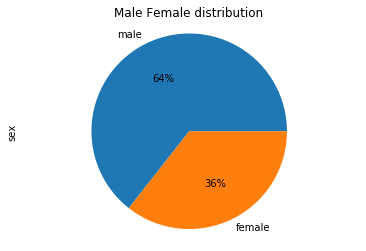

In [8]:
titanic.sex.value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.axis('equal')
plt.title('Male Female distribution')

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

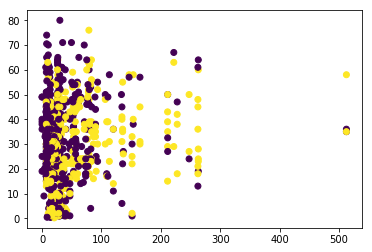

In [30]:
plt.scatter(titanic.fare,titanic.age,c=titanic['sex'].apply(lambda x:1 if x=='male' else 2 ),alpha=1)

In [22]:
?plt.legend

# 2.5. Problem Statement: Data Cleaning

It happens all the time: someone gives you data containing malformed strings, Python, lists
and missing data. How do you tidy it up so you can get on with the analysis?
Take this monstrosity as the DataFrame to use in the following puzzles:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

In [24]:
dc = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})
dc

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


1. Some values in the the FlightNumber column are missing. These numbers are meant to
increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
numbers and make the column an integer column (instead of a float column).

In [25]:
dc['FlightNumber'][1]=10055
dc['FlightNumber'][3]=10075
dc['FlightNumber'] = dc['FlightNumber'].apply(np.int64)
dc

C:\Users\smilepc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\smilepc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


2. The From_To column would be better as two separate columns! Split each string on the
underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
correct column names to this temporary DataFrame.

In [26]:
# spt= lambda x: pd.Series([i for i in reversed(x.split('_'))])
dc1= dc.From_To.str.split("_",expand=True) 
dc1.rename(columns={0:'From',1:'To'},inplace=True)
dc1

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
"London".)

In [27]:
dc1['From'] = dc1['From'].apply(lambda x: str(x[0]).upper()+x[1:].lower())
dc1['To'] = dc1['To'].apply(lambda x: str(x[0]).upper()+x[1:].lower())
dc1

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


4. Delete the From_To column from df and attach the temporary DataFrame from the previous
questions.

In [28]:
del dc['From_To']
dc=pd.concat([dc1, dc], axis=1)
dc

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47]",KLM(!)
1,Madrid,Milan,10055,[],<Air France> (12)
2,London,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,[13],12. Air France
4,Brussels,London,10085,"[67, 32]","""Swiss Air"""


5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
would like each first value in its own column, each second value in its own column, and so on. If
there isn't an Nth value, the value should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [29]:
def fun(x):
    while(len(x)<3):
        x.append('NaN')
    return x
dc['RecentDelays']=dc['RecentDelays'].apply(fun)
dc

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47, NaN]",KLM(!)
1,Madrid,Milan,10055,"[NaN, NaN, NaN]",<Air France> (12)
2,London,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,"[13, NaN, NaN]",12. Air France
4,Brussels,London,10085,"[67, 32, NaN]","""Swiss Air"""


In [30]:
dc['delay_1']=dc['RecentDelays'].apply(lambda x: x[0])
dc['delay_2']=dc['RecentDelays'].apply(lambda x: x[1])
dc['delay_3']=dc['RecentDelays'].apply(lambda x: x[2])
del dc['RecentDelays']
dc

,From,To,FlightNumber,Airline,delay_1,delay_2,delay_3
0,London,Paris,10045,KLM(!),23,47,NaN
1,Madrid,Milan,10055,<Air France> (12),NaN,NaN,NaN
2,London,Stockholm,10065,(British Airways. ),24,43,87
3,Budapest,Paris,10075,12. Air France,13,NaN,NaN
4,Brussels,London,10085,"""Swiss Air""",67,32,NaN


# 2.6. Problem Statement: Pandas SQL

In [79]:
sqladb = pd.read_csv('adult.data')
sqladb.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'Weights']
sqladb.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Weights
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [83]:
from pandas import DataFrame, Series
import sqlite3 
from pandasql import sqldf

In [85]:
conn = sqlite3.connect(':memory:')
sqladb.to_sql('sqladb', conn, if_exists='replace', index=False)
pd.read_sql('select * from sqladb', conn)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Weights
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


1. Select 10 records from the adult sqladb

In [86]:
pd.read_sql('SELECT * FROM sqladb LIMIT 10', conn)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Weights
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


2. Show me the average hours per week of all men who are working in private sector

In [91]:
pd.read_sql("SELECT avg(hours_per_week) as Avg_Wrk_hrs FROM sqladb where sex not like '%Female%' and workclass like '%Private%'", conn)

,Avg_Wrk_hrs
0,42.221226


3. Show me the frequency table for education, occupation and relationship, separately

In [92]:
pd.read_sql("SELECT education,occupation,relationship FROM sqladb LIMIT 10;",conn)

,education,occupation,relationship
0,Bachelors,Exec-managerial,Husband
1,HS-grad,Handlers-cleaners,Not-in-family
2,11th,Handlers-cleaners,Husband
3,Bachelors,Prof-specialty,Wife
4,Masters,Exec-managerial,Wife
5,9th,Other-service,Not-in-family
6,HS-grad,Exec-managerial,Husband
7,Masters,Prof-specialty,Not-in-family
8,Bachelors,Exec-managerial,Husband
9,Some-college,Exec-managerial,Husband


In [94]:
pd.read_sql("SELECT education,count(*) FROM sqladb group by education LIMIT 10;",conn)

,education,count(*)
0,10th,933
1,11th,1175
2,12th,433
3,1st-4th,168
4,5th-6th,333
5,7th-8th,646
6,9th,514
7,Assoc-acdm,1067
8,Assoc-voc,1382
9,Bachelors,5354


In [95]:
pd.read_sql("SELECT occupation,count(*) FROM sqladb group by occupation LIMIT 10;",conn)

,occupation,count(*)
0,?,1843
1,Adm-clerical,3769
2,Armed-Forces,9
3,Craft-repair,4099
4,Exec-managerial,4066
5,Farming-fishing,994
6,Handlers-cleaners,1370
7,Machine-op-inspct,2002
8,Other-service,3295
9,Priv-house-serv,149


In [96]:
pd.read_sql("SELECT relationship,count(*) FROM sqladb group by relationship LIMIT 10;",conn)

,relationship,count(*)
0,Husband,13193
1,Not-in-family,8304
2,Other-relative,981
3,Own-child,5068
4,Unmarried,3446
5,Wife,1568


4. Are there any people who are married, working in private sector and having a master’s
degree

In [102]:
pd.read_sql("SELECT * FROM sqladb where marital_status not like '%Never-married%' and workclass like  '%Private%' and education like '%Masters%' and marital_status not like '%Never-married%' ;",conn)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Weights
0,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
1,44,Private,128354,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
2,33,Private,202051,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
3,76,Private,124191,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
4,31,Private,99928,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,<=50K
5,35,Private,138992,Masters,14,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,7298,0,40,United-States,>50K
6,34,Private,142897,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,7298,0,35,Taiwan,>50K
7,62,Private,270092,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
8,41,Private,445382,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,65,United-States,>50K
9,33,Private,208405,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K


5. What is the average, minimum and maximum age group for people working in
different sectors

In [104]:
pd.read_sql("SELECT workclass,min(age) as min,max(age) as max,avg(age) avg FROM sqladb group by workclass  ;",conn)

,workclass,min,max,avg
0,?,17,90,40.960240
1,Federal-gov,17,90,42.590625
2,Local-gov,17,90,41.751075
3,Never-worked,17,30,20.571429
4,Private,17,90,36.797585
5,Self-emp-inc,17,84,46.017025
6,Self-emp-not-inc,17,90,44.969697
7,State-gov,17,81,39.436392
8,Without-pay,19,72,47.785714


6. Calculate age distribution by country

In [105]:
pd.read_sql("SELECT native_country,age,count(*) as count  FROM sqladb where native_country not like '%?%' group by native_country,age  ;",conn)

,native_country,age,count
0,Cambodia,18,1
1,Cambodia,25,1
2,Cambodia,27,2
3,Cambodia,28,1
4,Cambodia,32,1
5,Cambodia,34,1
6,Cambodia,35,1
7,Cambodia,36,1
8,Cambodia,37,2
9,Cambodia,40,2


7. Compute a new column as 'Net-Capital-Gain' from the two columns 'capitalgain' and 'capitalloss'

In [106]:
pd.read_sql("SELECT a.*,capital_gain-capital_loss as net_capital_gain FROM sqladb a group by workclass  ;",conn)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Weights,net_capital_gain
0,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,0
1,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,<=50K,0
2,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K,0
3,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,0
4,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
5,47,Self-emp-inc,109832,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,<=50K,0
6,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
7,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,0
8,65,Without-pay,27012,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,Female,0,0,50,United-States,<=50K,0


Problem statement 2:

Read the following data set:
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [55]:
sqlen1 = pd.read_csv('adult.data')
sqlen1.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'Weights']
sqlen=sqlen1.head()
sqlen

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Weights
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


1. Create an sqlalchemy engine using a sample from the data set

In [66]:
import sqlalchemy as db
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
sqlen.to_sql('sqlalch', con=engine)
sqlalch = db.Table('sqlalch', metadata, autoload=True, autoload_with=engine)
a=engine.execute("SELECT * FROM sqlalch").fetchall()
df=pd.DataFrame(a)
df.columns = a[0].keys()
df.head(5)

,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Weights
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


2. Write two basic update queries

In [67]:
query = db.update(sqlalch).values(race = 'Dark')
a = engine.execute(query)
a=engine.execute("SELECT * FROM sqlalch").fetchall()
df=pd.DataFrame(a)
df.columns = a[1].keys()
df.head(5)

,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Weights
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Dark,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Dark,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Dark,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Dark,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Dark,Female,0,0,40,United-States,<=50K


In [68]:
query = db.update(sqlalch).values(capital_gain = 100)
a = engine.execute(query)
a=engine.execute("SELECT * FROM sqlalch").fetchall()
df=pd.DataFrame(a)
df.columns = a[0].keys()
df.head(5)

,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Weights
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Dark,Male,100,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Dark,Male,100,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Dark,Male,100,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Dark,Female,100,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Dark,Female,100,0,40,United-States,<=50K


3. Write two delete queries

In [69]:
query = db.delete(sqlalch)
query = query.where(sqlalch.columns.education_num ==13)
a = engine.execute(query)
a=engine.execute("SELECT * FROM sqlalch").fetchall()
df=pd.DataFrame(a)
df.columns = a[0].keys()
df.head(5)

,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Weights
0,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Dark,Male,100,0,40,United-States,<=50K
1,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Dark,Male,100,0,40,United-States,<=50K
2,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Dark,Female,100,0,40,United-States,<=50K


In [70]:
query = db.delete(sqlalch)
query = query.where(sqlalch.columns.age ==38)
a = engine.execute(query)
a=engine.execute("SELECT * FROM sqlalch").fetchall()
df=pd.DataFrame(a)
df.columns = a[0].keys()
df.head(5)

,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Weights
0,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Dark,Male,100,0,40,United-States,<=50K
1,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Dark,Female,100,0,40,United-States,<=50K


4. Write two filter queries

In [73]:
query=db.select([sqlalch]).where(sqlalch.columns.education_num == 7)
a = engine.execute(query).fetchall()
df=pd.DataFrame(a)
df.columns = a[0].keys()
df.head(5)

,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Weights
0,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Dark,Male,100,0,40,United-States,<=50K


In [74]:
query=db.select([sqlalch]).where(sqlalch.columns.age == 53)
a = engine.execute(query).fetchall()
df=pd.DataFrame(a)
df.columns = a[0].keys()
df.head(5)

,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Weights
0,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Dark,Male,100,0,40,United-States,<=50K


5. Write two function queries

In [76]:
query=db.select([db.func.count(sqlalch.columns.age)])
a = engine.execute(query).fetchall()
df=pd.DataFrame(a)
df.columns = a[0].keys()
df.head(5)


,count_1
0,2


In [78]:
query=db.select([db.func.sum(sqlalch.columns.age)])
a = engine.execute(query).fetchall()
df=pd.DataFrame(a)
df.columns = a[0].keys()
df.head()

,sum_1
0,90
